In [1]:
import pandas as pd
import re
import spacy
import nltk

In [38]:
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

In [3]:
import matplotlib.pyplot as plt 

%matplotlib inline

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\SEO
[nltk_data]     test\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [4]:
from nltk.corpus import stopwords

In [44]:
import string
import pytz

In [6]:
df = pd.read_csv('C:/Users/SEO test/Downloads/4133_8841_bundle_archive/twcs/twcs.csv')

In [7]:
df.shape

(2811774, 7)

In [8]:
df.columns

Index(['tweet_id', 'author_id', 'inbound', 'created_at', 'text',
       'response_tweet_id', 'in_response_to_tweet_id'],
      dtype='object')

# Remove Punctuations from the tweet content and convert it to lowercase

In [9]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE)).lower()

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_wo_punct
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712 i understand i would like to assist you...
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare and how do you propose we do that
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare i have sent several private message...
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712 please send us a private message so tha...
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare i did


In [12]:
from nltk.corpus import stopwords

In [13]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_wo_punct,text_wo_stop
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712 i understand i would like to assist you...,115712 understand would like assist would need...
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare and how do you propose we do that,sprintcare propose
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare i have sent several private message...,sprintcare sent several private messages one r...
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712 please send us a private message so tha...,115712 please send us private message assist c...
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare i did,sprintcare


# Remove the 10 most frequent words

In [14]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('us', 451262),
 ('please', 402709),
 ('dm', 335374),
 ('help', 267633),
 ('hi', 224603),
 ('thanks', 206452),
 ('get', 200374),
 ('sorry', 192246),
 ('like', 146385),
 ('know', 145407)]

In [15]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_freq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_wo_punct,text_wo_stop,text_wo_freq
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare i did,sprintcare,sprintcare


# Remove the 10 most rare words

In [16]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
# print(RAREWORDS)
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text_wo_freqrare"] = df["text_wo_freq"].apply(lambda text: remove_rarewords(text))
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_wo_punct,text_wo_stop,text_wo_freq,text_wo_freqrare
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,sprintcare propose
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare i did,sprintcare,sprintcare,sprintcare


# Lemmatization

In [19]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_wo_freqrare"].apply(lambda text: lemmatize_words(text))
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_wo_punct,text_wo_stop,text_wo_freq,text_wo_freqrare,text_lemmatized
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,sprintcare propose,sprintcare propose
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private message one re...
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare i did,sprintcare,sprintcare,sprintcare,sprintcare


# Remove URLs

In [20]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [21]:
df["text_final"] = df["text_lemmatized"].apply(lambda text: remove_urls(text))
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_wo_punct,text_wo_stop,text_wo_freq,text_wo_freqrare,text_lemmatized,text_final
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,sprintcare propose,sprintcare propose,sprintcare propose
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private message one re...,sprintcare sent several private message one re...
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare i did,sprintcare,sprintcare,sprintcare,sprintcare,sprintcare


In [27]:
# !pip install scikit-learn

In [28]:
author_grouped = df.groupby('author_id')

In [30]:
top_support_providers = set(author_grouped.agg('count')
                                .sort_values(['tweet_id'], ascending=[0])
                                .index[:20]
                                .values)

<AxesSubplot:title={'center':'Top 20 Brands by Volume'}, ylabel='author_id'>

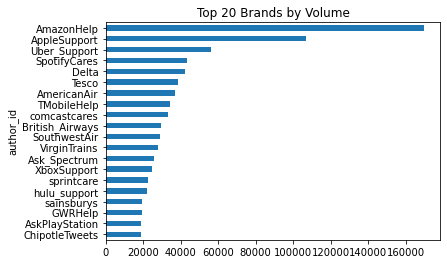

In [32]:
df \
    .loc[df.author_id.isin(top_support_providers)] \
    .groupby('author_id') \
    .tweet_id.count() \
    .sort_values() \
    .plot(kind='barh', title='Top 20 Brands by Volume')

In [113]:
ChipotleTweets_tweets1 = df[df['author_id'] == 'ChipotleTweets']

In [114]:
ChipotleTweets_tweets2 = df[df['text'].str.contains('ChipotleTweets')]

In [115]:
ChipotleTweets_tweets = pd.concat([ChipotleTweets_tweets1,ChipotleTweets_tweets2])

In [116]:
ChipotleTweets_tweets['created_at'] = pd.to_datetime(ChipotleTweets_tweets.created_at)

In [117]:
ChipotleTweets_tweets = ChipotleTweets_tweets.loc[ChipotleTweets_tweets.created_at > datetime(2017, 10, 7,0,0,0,0, pytz.UTC)]

In [118]:
ChipotleTweets_tweets.shape

(38074, 13)

In [119]:
ChipotleTweets_tweets.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_wo_punct,text_wo_stop,text_wo_freq,text_wo_freqrare,text_lemmatized,text_final
58,64,ChipotleTweets,False,2017-10-31 22:14:28+00:00,@115728 I still think you look great! -Becky,65,66.0,115728 i still think you look great becky,115728 still think look great becky,115728 still think look great becky,115728 still think look great becky,115728 still think look great becky,115728 still think look great becky
61,68,ChipotleTweets,False,2017-10-31 22:14:00+00:00,@115729 I'm so sorry about that. Please tell u...,NaN,69.0,115729 im so sorry about that please tell us m...,115729 im sorry please tell us help httpstcoax...,115729 im tell httpstcoax7w1dx3y9 becky,115729 im tell httpstcoax7w1dx3y9 becky,115729 im tell httpstcoax7w1dx3y9 becky,115729 im tell httpstcoax7w1dx3y9 becky
63,70,ChipotleTweets,False,2017-10-31 22:13:29+00:00,@115730 Hopefully we'll get there at some poin...,NaN,71.0,115730 hopefully well get there at some point ...,115730 hopefully well get point becky,115730 hopefully well point becky,115730 hopefully well point becky,115730 hopefully well point becky,115730 hopefully well point becky
65,73,ChipotleTweets,False,2017-10-31 22:12:39+00:00,@115731 Guac on! I'm happy it was such a great...,NaN,74.0,115731 guac on im happy it was such a great ex...,115731 guac im happy great experience becky,115731 guac im happy great experience becky,115731 guac im happy great experience becky,115731 guac im happy great experience becky,115731 guac im happy great experience becky
67,75,ChipotleTweets,False,2017-10-31 20:37:31+00:00,@115731 It's because you're smart. -Tara,74,76.0,115731 its because youre smart tara,115731 youre smart tara,115731 youre smart tara,115731 youre smart tara,115731 youre smart tara,115731 youre smart tara


In [120]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(ChipotleTweets_tweets['text_final'].values.astype('U'))

In [121]:
# count_data = count_vectorizer.fit_transform(papers['paper_text_processed']

In [122]:
doc_term_matrix.shape

(38074, 10152)

In [164]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [165]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [166]:
print_topics(LDA, count_vect, 20)


Topic #0:
becky tay im thats tell httpstcoax7w1dx3y9 httpstco0f6pfdyu9j concerning whit sure chipotletweets oh reach send check patrick look right olivia good

Topic #1:
chipotletweets burrito bowl chipotle queso guac got today chip rice need chicken day free food chorizo guy extra cheese make

Topic #2:
james chipotletweets love queso ac new thank try thats hear ingredient different troubling working contact investigate hope ill yes recipe

Topic #3:
tara im gabe let httpstco0f6pfdyu9j team share manager httpstconrhudiek7g ac hear write thats jen concerning shawn youre make ill james

Topic #4:
chipotletweets chipotle order time online food location customer store line ac app service sound going eat ordering week amp want


In [167]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(5))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(LDA, doc_term_matrix, count_vect)
    with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(5) +'.html')

# Analysis of topic modelling

Some of the most eye catching clusters:
1. The first 2 topics (Topic#0, Topic #1) seems to be more of a complaining tweets where in customers are complaining and sharing their concerns. It is clear from words like ill, concern, trouble. Also, since it is a food chain, the most complaints are generally about food quality, delivery and service. Also, we could merge these topics since they pretty much talk about the complaints.
2. The other 2 topics Topic#3, Topic#4 have words such as good, great, enjoy, happy, glad hope which suggests happiness of the employees.
3. Topic#2 is a mixture of happy and unhappy customers with words such as bummer, glad.

Also, on analysing and looking at the attached html, one of the topics that come in all the 2 unhappy customer clusters seem to have a mention of "burrito", which means it is an item talked about quite often. The organisation can try to find out the issues with it, be it taste or potion and try to improve it like running offers, schemes or discounts on these items. Also, they can perform a market basket analysis to see what all other items pair well with Burrito and have combo offers to improve on the sales.

When it comes to happy customers, I think there is no common food item mentioned, but there are words such as location, recipe, ingredients that suggest that people are talking about the location of the restaurant joint, and also the recipes and ingredients.

These are some of the topics that the organisation can choose to focus on when it comes to marketing strategy.

# Sentiment Analysis

Lets perform sentimental analysis on tweets from Chipotle customers and try to find out what are the customers most unhapy about.

In [126]:
ChipotleTweets_tweets_in = ChipotleTweets_tweets2[ChipotleTweets_tweets2['inbound']==True]

In [128]:
ChipotleTweets_tweets_in.shape

(21593, 13)

In [49]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\SEO
[nltk_data]     test\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [129]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

ChipotleTweets_tweets_in['score'] = ChipotleTweets_tweets_in.text_final.apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])


c:\users\seo test\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [130]:
# df_inbound[1:2]['text_wo_punct'].values[0]

In [131]:
ChipotleTweets_tweets_in.shape

(21593, 14)

In [139]:
first_inbound = ChipotleTweets_tweets_in[pd.isnull(ChipotleTweets_tweets_in.in_response_to_tweet_id) & ChipotleTweets_tweets_in.inbound]
print(first_inbound.shape)
inbounds_and_outbounds = pd.merge(first_inbound, ChipotleTweets_tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')

inbounds_and_outbounds = inbounds_and_outbounds[inbounds_and_outbounds.inbound_y ^ True]

(12996, 14)


In [140]:
inbounds_and_outbounds.shape

(12135, 27)

In [141]:
inbounds_and_outbounds['inbound_sentiment'] = inbounds_and_outbounds.text_x.apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

In [142]:
inbounds_and_outbounds.head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,text_wo_punct_x,text_wo_stop_x,text_wo_freq_x,...,text_y,response_tweet_id_y,in_response_to_tweet_id_y,text_wo_punct_y,text_wo_stop_y,text_wo_freq_y,text_wo_freqrare_y,text_lemmatized_y,text_final_y,inbound_sentiment
0,66,115728,True,Tue Oct 31 22:03:38 +0000 2017,@ChipotleTweets @28 \nI don't fit in my Veggie...,"64,67",NaN,chipotletweets 28 \ni dont fit in my veggie bu...,chipotletweets 28 dont fit veggie burrito cost...,chipotletweets 28 dont fit veggie burrito cost...,...,@115728 I still think you look great! -Becky,65,66.0,115728 i still think you look great becky,115728 still think look great becky,115728 still think look great becky,115728 still think look great becky,115728 still think look great becky,115728 still think look great becky,-0.2755
2,69,115729,True,Tue Oct 31 22:03:32 +0000 2017,@ChipotleTweets messed up today and didn’t giv...,68,NaN,chipotletweets messed up today and didn’t give...,chipotletweets messed today didn’t give 3 burr...,chipotletweets messed today didn’t give 3 burr...,...,@115729 I'm so sorry about that. Please tell u...,NaN,69.0,115729 im so sorry about that please tell us m...,115729 im sorry please tell us help httpstcoax...,115729 im tell httpstcoax7w1dx3y9 becky,115729 im tell httpstcoax7w1dx3y9 becky,115729 im tell httpstcoax7w1dx3y9 becky,115729 im tell httpstcoax7w1dx3y9 becky,-0.3400
3,71,115730,True,Tue Oct 31 22:03:06 +0000 2017,hey @ChipotleTweets wanna come to Mammoth. I'l...,"70,72",NaN,hey chipotletweets wanna come to mammoth ill a...,hey chipotletweets wanna come mammoth ill leas...,hey chipotletweets wanna come mammoth ill leas...,...,@115730 Hopefully we'll get there at some poin...,NaN,71.0,115730 hopefully well get there at some point ...,115730 hopefully well get point becky,115730 hopefully well point becky,115730 hopefully well point becky,115730 hopefully well point becky,115730 hopefully well point becky,0.3182
4,76,115731,True,Tue Oct 31 20:21:10 +0000 2017,When you're the only one in costume #boorito @...,75,NaN,when youre the only one in costume boorito chi...,youre one costume boorito chipotletweets,youre one costume boorito chipotletweets,...,@115731 It's because you're smart. -Tara,74,76.0,115731 its because youre smart tara,115731 youre smart tara,115731 youre smart tara,115731 youre smart tara,115731 youre smart tara,115731 youre smart tara,0.0000
5,78,115732,True,Tue Oct 31 22:01:40 +0000 2017,@ChipotleTweets no Diet Coke and a literal bon...,77,NaN,chipotletweets no diet coke and a literal bone...,chipotletweets diet coke literal bone boorito ...,chipotletweets diet coke literal bone boorito ...,...,@115732 That's incredibly concerning. Please t...,NaN,78.0,115732 thats incredibly concerning please tell...,115732 thats incredibly concerning please tell...,115732 thats incredibly concerning tell httpst...,115732 thats incredibly concerning tell httpst...,115732 thats incredibly concerning tell httpst...,115732 thats incredibly concerning tell httpst...,-0.3595


In [148]:
inbounds_and_outbounds['created_at_x'] = pd.to_datetime(inbounds_and_outbounds.created_at_x)

Text(0, 0.5, 'Customer Sentiment')

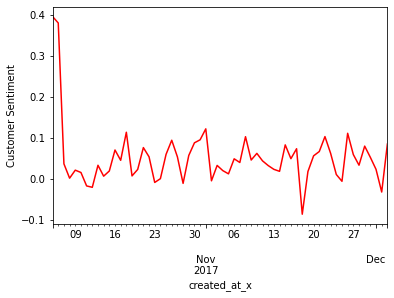

In [149]:


plt.subplot(1, 1, 1)
ax = inbounds_and_outbounds \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .inbound_sentiment.mean() \
    .sort_index() \
    .plot(color='red')
ax.set_ylabel('Customer Sentiment')

In [150]:
limit_pos = 0.5
limit_neg = -0.5
limit_neg_per_author = 3
#plt.plot(inbound_tweets.index.values, inbound_tweets['score'], 'r')
#plt.axhline(0.5, 'g.')
inbounds_and_outbounds['is_pos'] = (inbounds_and_outbounds[['inbound_sentiment']] > limit_pos)
inbounds_and_outbounds['is_neg'] = (inbounds_and_outbounds[['inbound_sentiment']] < limit_neg)
inbounds_and_outbounds['is_other'] = ~inbounds_and_outbounds.is_pos & ~inbounds_and_outbounds.is_neg

In [151]:
sprint_neg = inbounds_and_outbounds[inbounds_and_outbounds['is_neg']==True]
sprint_pos = inbounds_and_outbounds[inbounds_and_outbounds['is_pos']==True]

In [152]:
sprint_neg.shape

(1701, 31)

# Word Cloud for negative tweets

In [ ]:
# comment_words = '' 
stopwords = set(list(STOPWORDS)+['chipotle']+list(inbounds_and_outbounds['author_id_y'].values)+list(inbounds_and_outbounds['author_id_y'].values)) 
  
# iterate through the csv file 
for val in sprint_neg['text_final_x']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Analysis

The most talked about words in negative tweets are queso, order, burrito, bowl, etc. These suggest that people are unhapppy about the queso dip, maybe the quality of order or the time taken to deliver the order. Also, the word bowl may suggest on the portion.

# Next steps

1. This is a very raw analysis on the tweets for one organisation. We can try and perform different topic modelling algorithms such as LSA or pLSA. And also different types of vectorization techniques such as tfidf, word2vec, etc in order to look for better clusters.
2. Similarly different types of algoeithms or pre-existing libraries can be used for performing sentimental analysis.
3. Since no target variable was given, I chose to use pre existing libraries and perform sentimental analysis. Given time we can also try and perform supervised learning by labelling these tweets into more classes of sentiments.

# Extra chart for happy customers

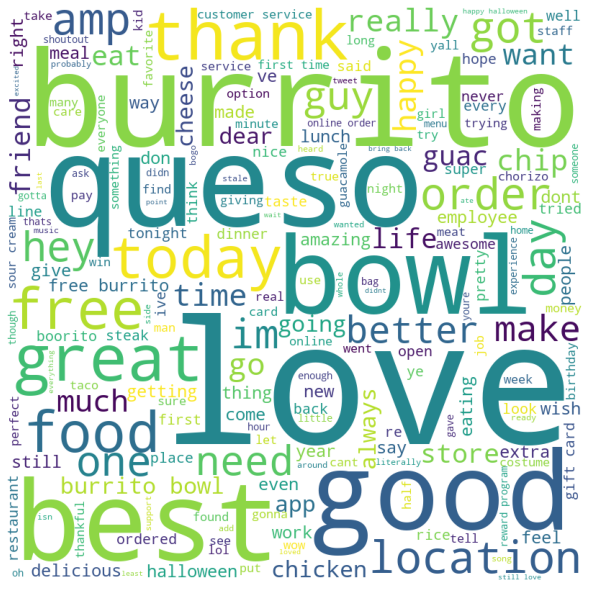

In [162]:
comment_words = '' 
stopwords = set(list(STOPWORDS)+['chipotle']+list(inbounds_and_outbounds['author_id_y'].values)+list(inbounds_and_outbounds['author_id_y'].values)) 
  
# iterate through the csv file 
for val in sprint_pos['text_final_x']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
print(data[0:1]['text'].values[0])